# Data Join


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import librosa.display
import os

# First Dataset text_emotion

In [6]:
def preprocess_text_emotion_data():
    """
    This function reads in the first dataset text_emotion, cleans the data,
    renames columns, performs label encoding, and drops missing values. 

    Returns:
    pandas.DataFrame: The preprocessed dataset.
    """

    # Load the data
    df = pd.read_csv('../data/text_emotion.csv')

    # Initial exploration
    df_clean = df.drop(['author', 'tweet_id'], axis=1)
    df_clean.rename(columns={'content': 'text', 'sentiment': 'label'}, inplace=True)

    # Check the data
    print(df_clean.head())
    print(df_clean.shape)
    print(df_clean['label'].value_counts())
    

    df_clean['label'].value_counts().plot(rot=0, kind='barh', color='green')
    plt.show()

    # Map labels to integers
    label_map = {
        'sadness': 0,
        'empty': 0,
        'joy': 1,
        'happiness': 1,
        'fun': 1,
        'enthusiasm': 1,
        'relief': 1,
        'love': 2,
        'anger': 3,
        'hate': 3,
        'fear': 4,
        'worry': 4,
        'surprise': 5,
        'neutral': 6,
        'boredom': 6
    }
    df_clean['label'] = df_clean['label'].replace(label_map)

    # Check the data
    print(df_clean.head())
    print(df_clean['label'].tolist())
    plt.hist(df_clean['label'].tolist(), bins=7)
    plt.show()

    # Drop NA
    df_clean.dropna(inplace=True)
    print(df_clean.shape)
    print(df_clean.head())

    return df_clean

In [4]:
def plot_label_histogram(df: pd.DataFrame) -> None:
    """
    Plots a histogram of the label column of a given DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame to plot the histogram of.

    Returns
    -------
    None

    """
    # Get the list of labels
    label_list = df['label'].tolist()

    # Plot the histogram
    plt.hist(label_list, bins=7)
    plt.show()

        label                                               text
0       empty  @tiffanylue i know  i was listenin to bad habi...
1     sadness  Layin n bed with a headache  ughhhh...waitin o...
2     sadness                Funeral ceremony...gloomy friday...
3  enthusiasm               wants to hang out with friends SOON!
4     neutral  @dannycastillo We want to trade with someone w...
(40000, 2)
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: label, dtype: int64


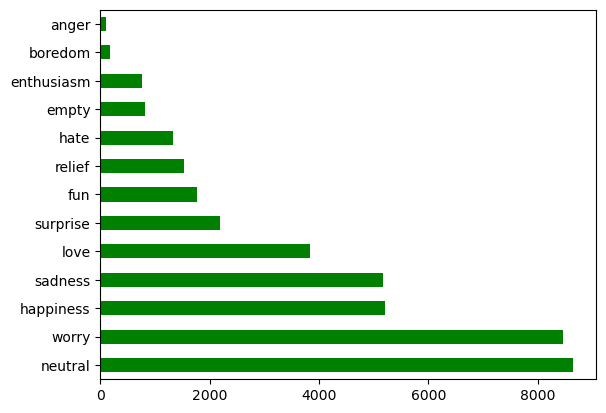

   label                                               text
0      0  @tiffanylue i know  i was listenin to bad habi...
1      0  Layin n bed with a headache  ughhhh...waitin o...
2      0                Funeral ceremony...gloomy friday...
3      1               wants to hang out with friends SOON!
4      6  @dannycastillo We want to trade with someone w...
[0, 0, 0, 1, 6, 4, 0, 4, 0, 0, 6, 4, 0, 0, 5, 0, 2, 0, 4, 0, 4, 1, 6, 4, 0, 4, 0, 4, 0, 4, 3, 6, 6, 6, 6, 6, 0, 4, 6, 6, 1, 1, 4, 4, 0, 4, 4, 0, 6, 6, 6, 4, 0, 6, 6, 4, 1, 6, 6, 0, 4, 0, 0, 0, 0, 6, 4, 0, 4, 1, 6, 4, 6, 6, 4, 6, 6, 1, 4, 4, 0, 6, 0, 4, 0, 4, 3, 4, 4, 4, 6, 6, 4, 6, 2, 0, 0, 0, 6, 3, 4, 3, 6, 0, 4, 3, 0, 3, 4, 0, 4, 6, 6, 6, 6, 6, 0, 6, 6, 0, 6, 3, 2, 4, 3, 0, 1, 0, 6, 4, 6, 2, 0, 6, 6, 0, 0, 6, 6, 4, 6, 0, 6, 4, 6, 4, 6, 1, 1, 6, 0, 2, 4, 4, 4, 4, 6, 4, 4, 4, 3, 4, 0, 0, 5, 1, 0, 4, 0, 6, 4, 0, 4, 0, 0, 6, 6, 4, 6, 1, 0, 6, 1, 0, 4, 0, 0, 4, 4, 5, 5, 0, 5, 0, 5, 4, 3, 4, 1, 4, 0, 4, 0, 0, 0, 6, 3, 6, 6, 3, 2, 0, 3, 

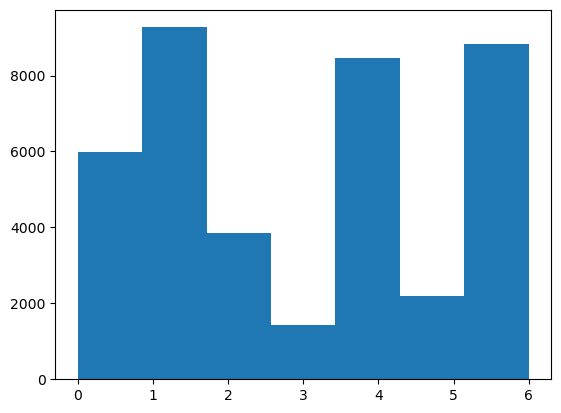

(40000, 2)
   label                                               text
0      0  @tiffanylue i know  i was listenin to bad habi...
1      0  Layin n bed with a headache  ughhhh...waitin o...
2      0                Funeral ceremony...gloomy friday...
3      1               wants to hang out with friends SOON!
4      6  @dannycastillo We want to trade with someone w...


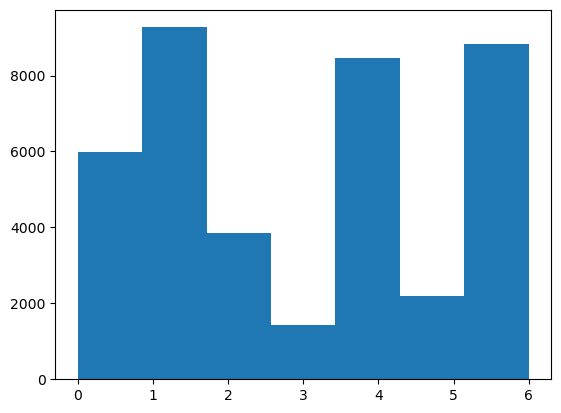

In [7]:
df_1 = preprocess_text_emotion_data()
plot_label_histogram(df_1)

# Second dataset training

In [8]:
def preprocess_training_data():
    """
    This function reads in the send dataset training dropping rows with missing values.

    Returns:
    pandas.DataFrame: The cleaned DataFrame with missing rows removed.

    """
    df_clean_2 = pd.read_csv('../data/training.csv')
    
    df_clean_2.dropna(inplace=True)
    return df_clean_2

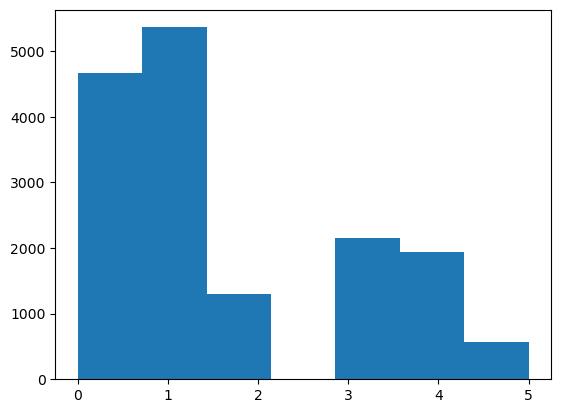

In [9]:
df_2 = preprocess_training_data()
plot_label_histogram(df_2)

# Third dataset train_sent_emo

In [10]:
def preprocess_text_sent_emo_data():
    """
    This function reads in the third dataset train_sent_emo, cleans the data,
    renames columns, performs label encoding, and drops missing values. 

    Returns:
    pandas.DataFrame: The preprocessed dataset.
    """
    
    # Read in the data
    df_3 = pd.read_csv('../data/train_sent_emo.csv')
    
    # Clean the data
    df_clean_3 = df_3.drop(['Sr No.', 'Speaker','Sentiment','Dialogue_ID','Utterance_ID','Season','Episode','StartTime','EndTime'], axis=1)
    df_clean_3 = df_clean_3.rename(columns={'Utterance': 'text', 'Emotion': 'label'})
    
    # Perform label encoding
    label_map = {'sadness': 0, 'empty': 0, 'joy': 1, 'happiness': 1, 'fun': 1, 'enthusiasm': 1, 'relief': 1, 
                 'love': 2, 'anger': 3, 'hate': 3, 'disgust': 3, 'fear': 4, 'worry': 4, 'surprise': 5, 
                 'neutral': 6, 'boredom': 6}
    df_clean_3['label'] = df_clean_3['label'].replace(label_map)
    
    # Drop missing values
    df_clean_3 = df_clean_3.dropna()
    
    return df_clean_3

In [11]:
def plot_label_counts(label_dict):
    """
    This function takes in a dictionary of label counts and plots a horizontal bar chart.

    Parameters:
    dict: The dictionary of label counts.
    """
    
    fig, ax = plt.subplots()
    ax.barh(list(label_dict.keys()), list(label_dict.values()), color='green')
    ax.set_title('All labels')
    ax.set_xlabel('Count')
    plt.show()

In [12]:
def join_datasets(df_1,df_2,df_3):
    """
    This function joins the three cleaned datasets, and creates a dictionary of label counts.
    
    Parameters:
    pandas.DataFrame: The first dataset to be joined.
    pandas.DataFrame: The second dataset to be joined.
    pandas.DataFrame: The third dataset to be joined.

    Returns:
    pandas.DataFrame: The joined dataset.
    dict: The dictionary of label counts.
    """
    
    # Join datasets
    df_joined = pd.concat([df_1, df_2, df_3], ignore_index=True)
    
    # Create a dictionary of label counts
    label_list_clean = df_joined['label'].tolist()
    label_counts = [label_list_clean.count(0), label_list_clean.count(1), label_list_clean.count(2), 
                    label_list_clean.count(3), label_list_clean.count(4), label_list_clean.count(5), 
                    label_list_clean.count(6)]
    
    label_dict = dict(zip(['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise', 'Neutral'], label_counts))

    return df_joined, label_dict

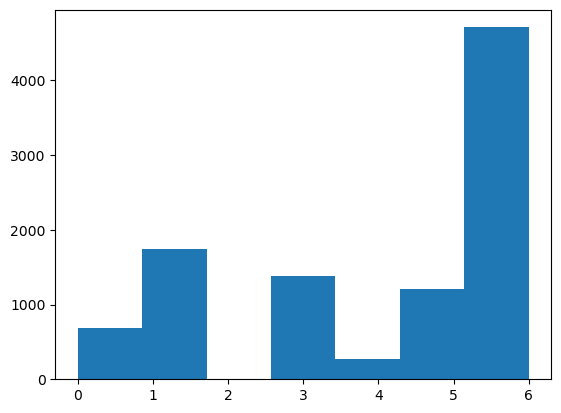

In [13]:
df_3 =  preprocess_text_sent_emo_data()
plot_label_histogram(df_3)

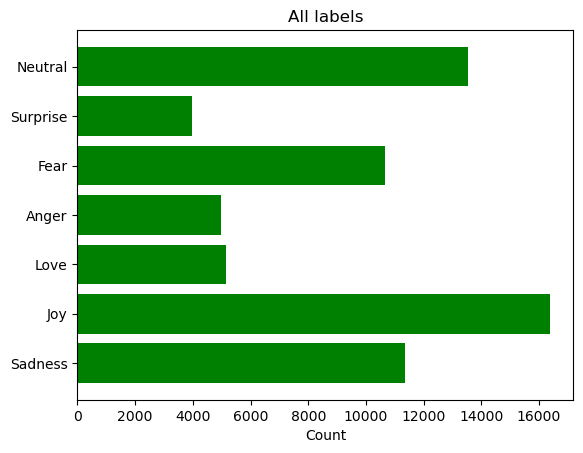

In [14]:
joined_data,label_dict = join_datasets(df_1,df_2,df_3)
plot_label_counts(label_dict)

In [19]:
joined_data['label'].unique()

array([0, 1, 6, 4, 5, 2, 3])

# Outfile with datasets concatenated

In [21]:
from pathlib import Path

filepath = Path('../data/cleaned/out.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
joined_data.to_csv(filepath, index=False)

In [ ]:
#Read in the data
# df_clean_imp = pd.read_csv('../data/cleaned/out.csv')
# df_clean_imp.head()
# df_clean_imp.shape